January, 2016: Getting familiarized with ANHA model output.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
from IPython.core.display import Image, display
from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Model Data

In [2]:
dataT = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_gridT_y2002m07d19.nc','r')

In [3]:
dataW = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_gridW_y2002m07d19.nc','r')
dataU = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_gridU_y2002m07d19.nc','r')
dataV = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_gridV_y2002m07d19.nc','r')

In [4]:
grid=nc.Dataset('/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')

In [5]:
mz = dataT.variables['somxl010']
ssh = dataT.variables['sossheig'][0,:]
sal = dataT.variables['vosaline'][0,:]
temp = dataT.variables['votemper'][0,:]

z = dataW.variables['depthw']
t = dataW.variables['time_counter']
w = dataW.variables['vovecrtz']
u = dataU.variables['vozocrtx']
v = dataV.variables['vomecrty']
kv = dataW.variables['votkeavt']

bathy = grid.variables['Bathymetry'][:]
lon = grid.variables['nav_lon'][:]
lat = grid.variables['nav_lat'][:]

bathym = np.ma.masked_where(bathy == 0, bathy)
salm = np.ma.masked_where(bathy == 0, sal[0])

### Domain

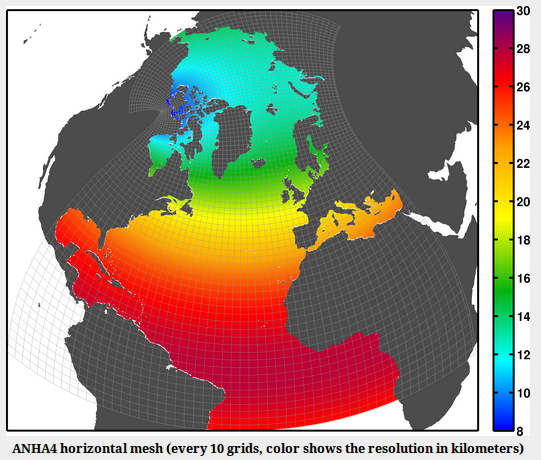

In [6]:
x = Image(filename='/ocean/imachuca/Canyons/mackenzie_canyon/images/ANHA4domain.png')
display(x)

SEA

/home/imachuca/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


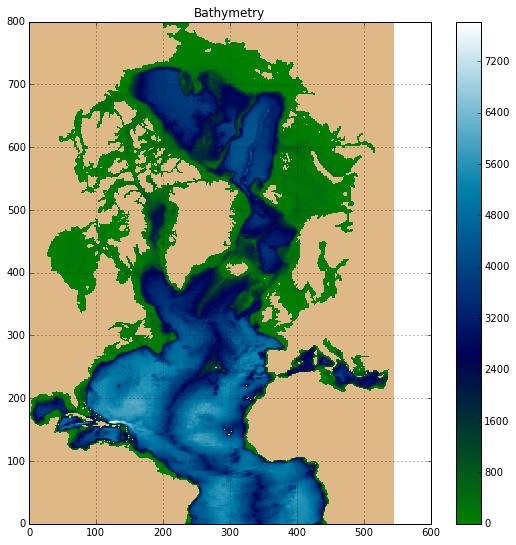

In [7]:
fig, ax = plt.subplots(1,1,figsize = (9,9))
cmap = plt.get_cmap('ocean')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax.pcolormesh(bathym, cmap=cmap)
fig.colorbar(mesh, ax=ax)
ax.set_title('Bathymetry')
ax.grid()

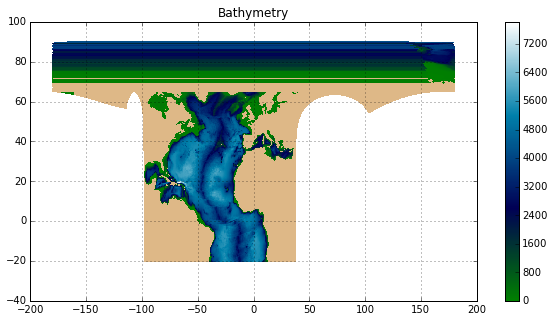

In [8]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
cmap = plt.get_cmap('ocean')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax.pcolormesh(lon,lat,bathym, cmap=cmap)
fig.colorbar(mesh, ax=ax)
ax.set_title('Bathymetry')
ax.grid()

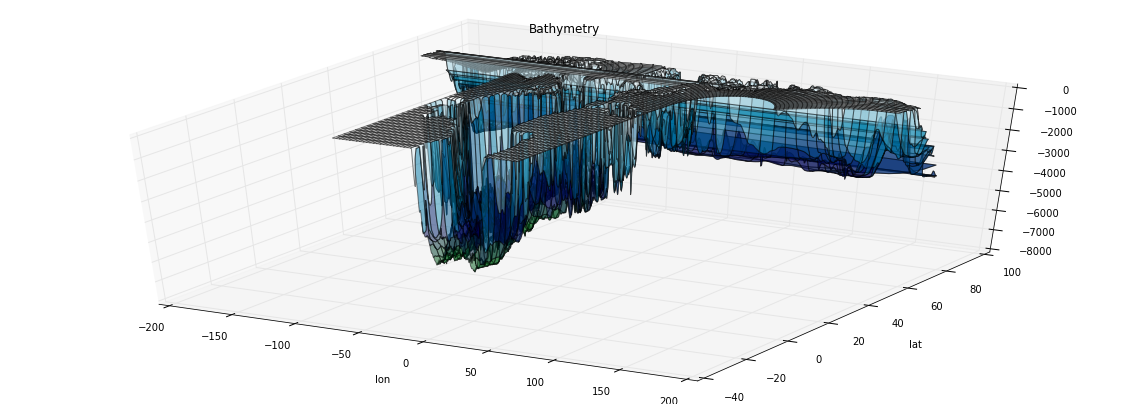

In [9]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(lon[:],lat[:],-bathy[:],cmap=cm.ocean, alpha=0.5)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.view_init(elev=40, azim=-60)
ax.set_title('Bathymetry')

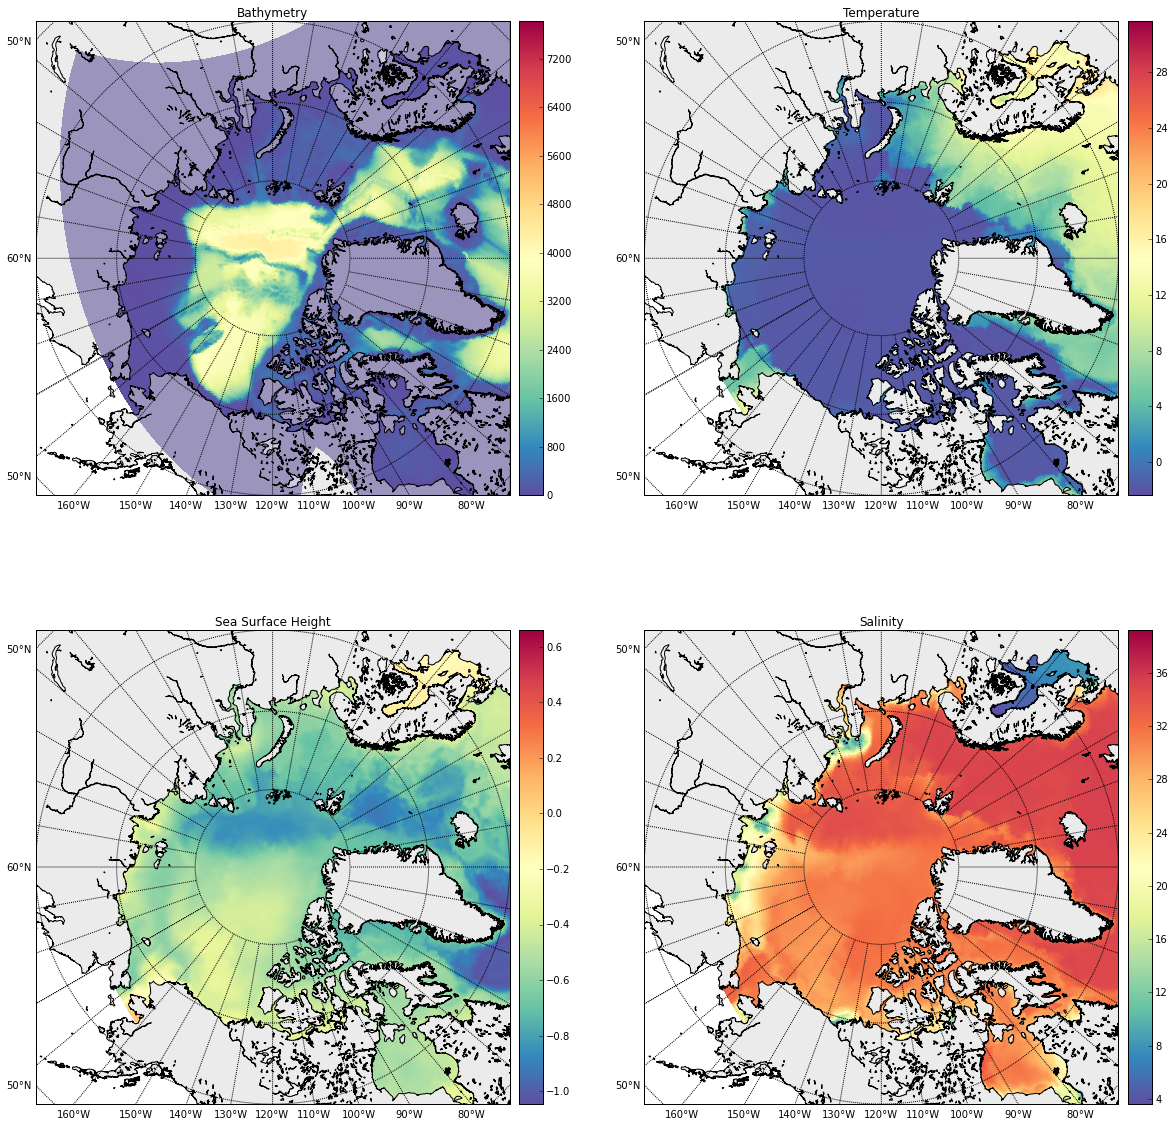

In [10]:
def add_map_details(m):
    m.drawcoastlines()
    m.fillcontinents(color = '0.85', alpha=0.5)
    m.drawparallels(np.arange(0.,91,10.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,10.), labels=[0, 0, 0, 1])

def make_basemap(var, var_n):
    m = Basemap(projection='npstere', boundinglat=60, lon_0=240, resolution='i')
    add_map_details(m)
    x_lon, y_lat = m(lon, lat)
    p = m.pcolor(x_lon, y_lat, var, cmap = 'Spectral_r')
    cbar = m.colorbar(p)
    plt.title(var_n)
    

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
make_basemap(bathy, 'Bathymetry')
ax2 = fig.add_subplot(2,2,2)
make_basemap(temp[0,:,:], 'Temperature')
ax3 = fig.add_subplot(2,2,3)
make_basemap(ssh[:,:], 'Sea Surface Height')
ax4 = fig.add_subplot(2,2,4)
make_basemap(sal[0,:,:], 'Salinity')

plt.show()


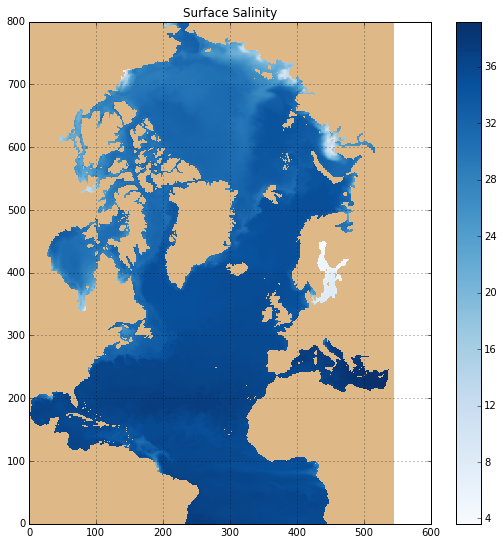

In [11]:
fig, ax = plt.subplots(1,1,figsize = (9,9))
cmap = plt.get_cmap('Blues')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax.pcolormesh(sal[0], cmap=cmap)
fig.colorbar(mesh, ax=ax)
ax.set_title('Surface Salinity')
ax.grid()

### Canyon

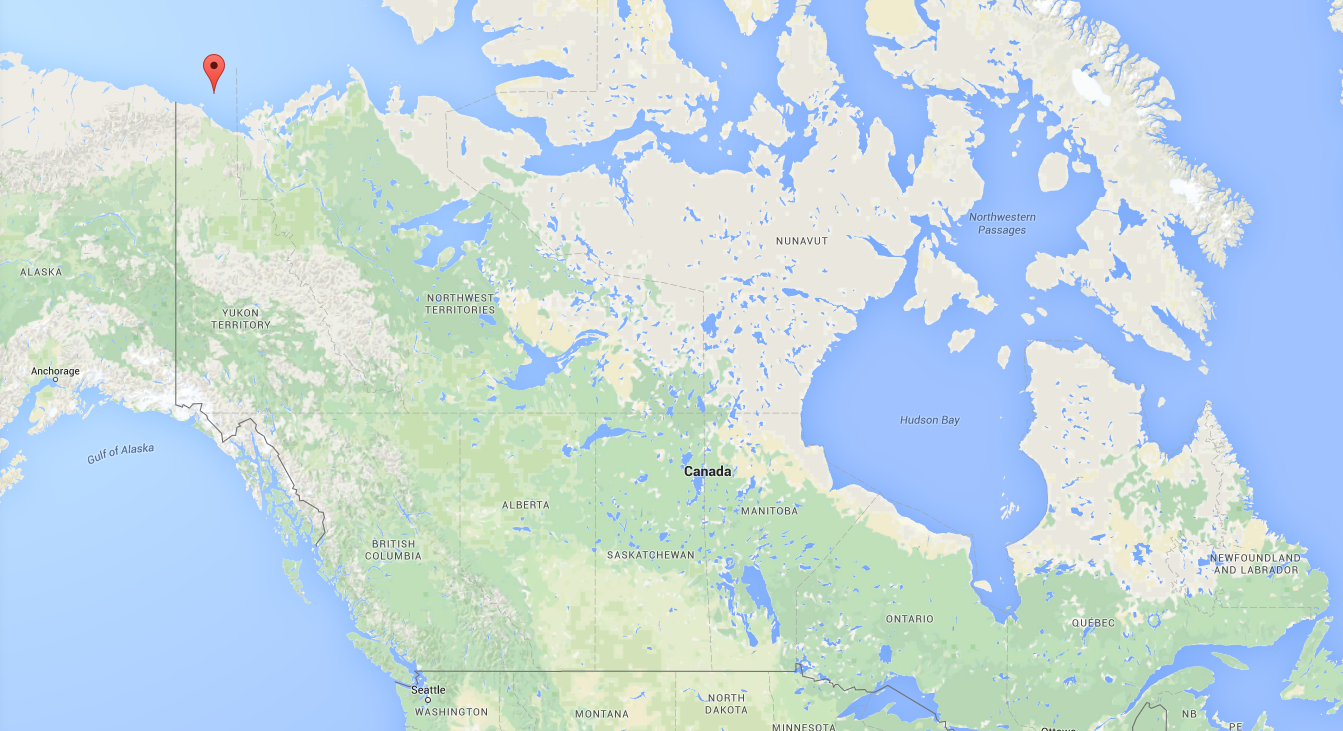

In [12]:
y = Image(filename='/ocean/imachuca/Canyons/mackenzie_canyon/images/CanyonMap.png', width=700)
display(y)

(650, 750)

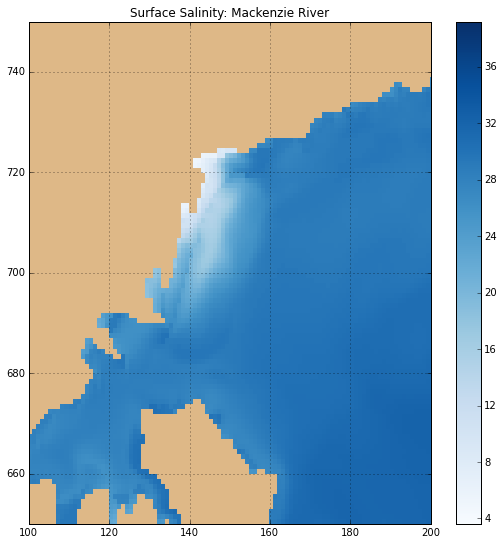

In [13]:
fig, ax = plt.subplots(1,1,figsize = (9,9))
cmap = plt.get_cmap('Blues')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax.pcolormesh(sal[0], cmap=cmap)
fig.colorbar(mesh, ax=ax)
ax.set_title('Surface Salinity: Mackenzie River')
ax.grid()

ax.set_xlim(100, 200)
ax.set_ylim(650, 750)

SEA

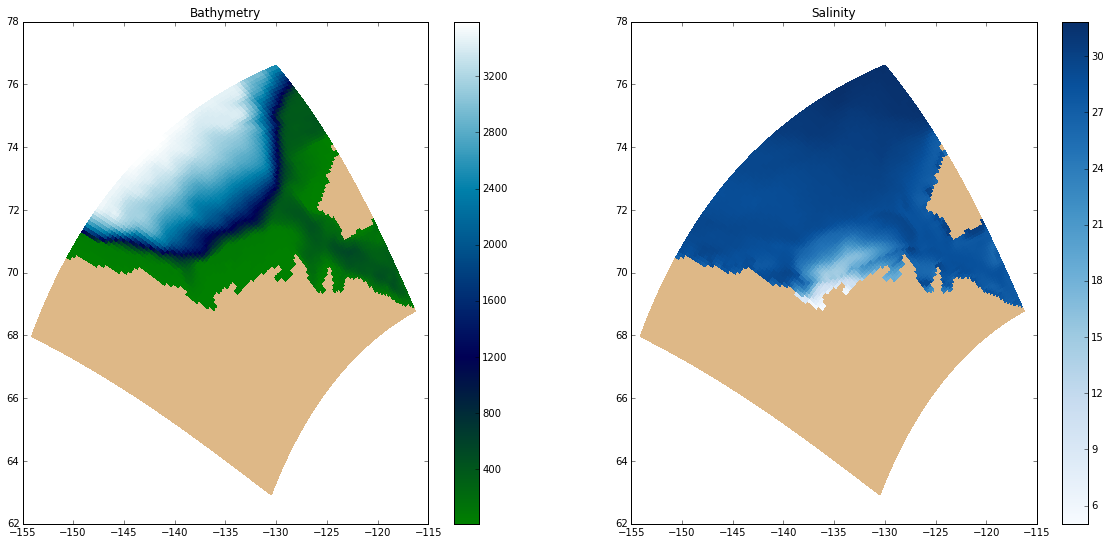

In [29]:
#imin = 700; imax = 770; jmin =125; jmax= 250
#right, left, bottom, top
imin = 660; imax = 760; jmin = 90; jmax = 190

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,9))
cmap = plt.get_cmap('ocean')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(lon[imin:imax, jmin:jmax], lat[imin:imax, jmin:jmax], bathym[imin:imax, jmin:jmax],
                    cmap=cmap)
fig.colorbar(mesh, ax=ax1)
ax1.set_title('Bathymetry')


cmap = plt.get_cmap('Blues')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(lon[imin:imax, jmin:jmax], lat[imin:imax, jmin:jmax], salm[imin:imax, jmin:jmax],
                    cmap=cmap)
fig.colorbar(mesh, ax=ax2)
ax2.set_title('Salinity')

{68.0: ([<matplotlib.lines.Line2D at 0x7f86452e7750>],
  [<matplotlib.text.Text at 0x7f86452f6bd0>]),
 70.0: ([<matplotlib.lines.Line2D at 0x7f86452f66d0>],
  [<matplotlib.text.Text at 0x7f86452fe0d0>])}

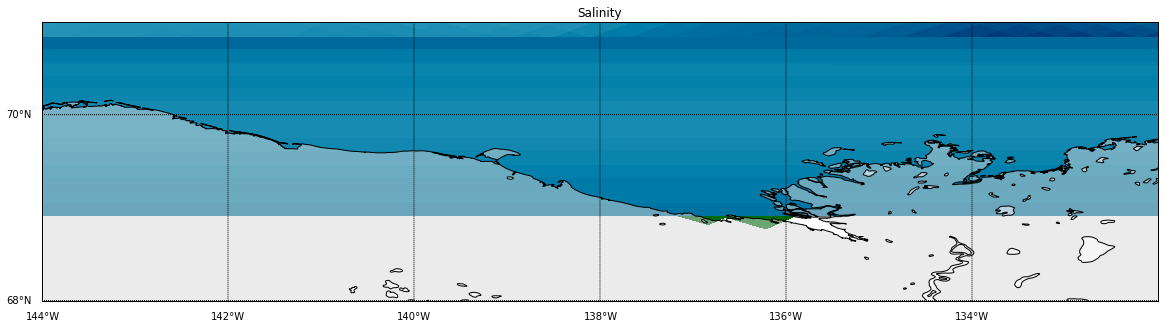

In [15]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='cyl', llcrnrlat=68, urcrnrlat=71, llcrnrlon=-144, urcrnrlon=-132, resolution='f') 
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
plt.title('Salinity')
x_lon, y_lat = m(lon, lat)
p = ax.pcolor(x_lon, y_lat, sal[0], cmap = 'ocean')
m.drawmeridians(np.arange(-144.,-132.,2.), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(60.,80.,2.), labels=[1, 0, 0, 0])

### 3D

(-144, -132, 69, 71)

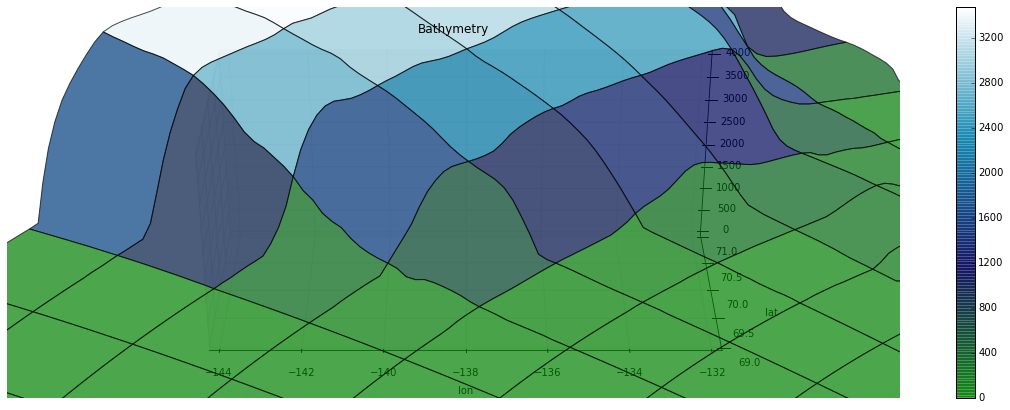

In [30]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
cmap = plt.get_cmap('ocean')
surf = ax.plot_surface(lon[imin:imax, jmin:jmax], lat[imin:imax, jmin:jmax], bathym[imin:imax, jmin:jmax], cmap=cmap, alpha=0.7)
plt.colorbar(surf)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.set_title('Bathymetry')
ax.view_init(elev=30, azim=-90)
plt.axis((-144, -132, 69, 71))


(-144, -132, 69, 71)

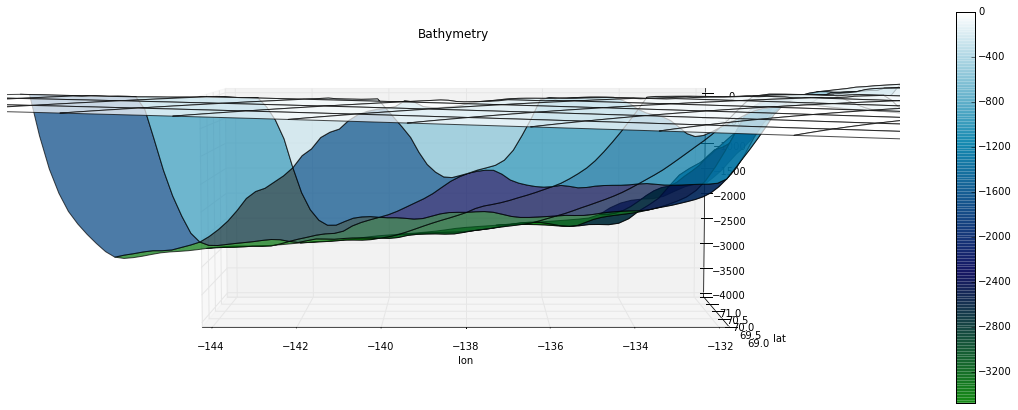

In [31]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
cmap = plt.get_cmap('ocean')
surf = ax.plot_surface(lon[imin:imax, jmin:jmax], lat[imin:imax, jmin:jmax], -bathym[imin:imax, jmin:jmax], cmap=cmap, alpha=0.7)
plt.colorbar(surf)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.set_title('Bathymetry')
ax.view_init(elev=5, azim=-90)
plt.axis((-144, -132, 69, 71))

### Velocity

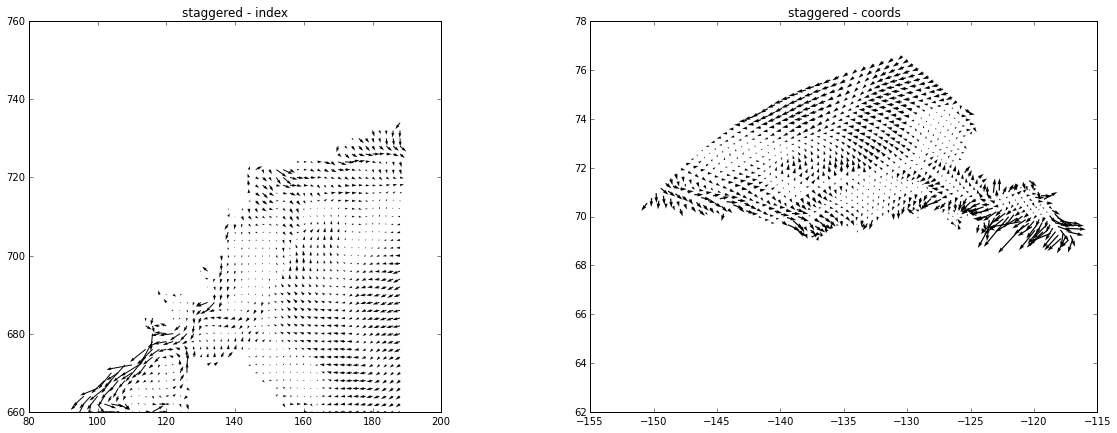

In [39]:
from salishsea_tools import (viz_tools)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,7))

t_slice, z_slice = 0, 0
x_slice = np.arange(jmin, jmax)
y_slice = np.arange(imin, imax)
um = np.ma.masked_values(u[t_slice, z_slice, y_slice, x_slice], 0)
vm = np.ma.masked_values(v[t_slice, z_slice, y_slice, x_slice], 0)
umm, vmm = viz_tools.unstagger(um, vm)
arrow_step = 2
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ax1.quiver(x_slice_a[:], y_slice_a[:], um[::2,::2], vm[::2,::2])
viz_tools.set_aspect(ax1)
ax1.set_title('staggered - index')

lats_slice = lat[imin:imax, jmin:jmax]
lons_slice = lon[imin:imax, jmin:jmax]
ax2.quiver(lons_slice[1::2, 1::2], lats_slice[1::2, 1::2], um[::2,::2], vm[::2,::2])
#viz_tools.set_aspect(ax2)
ax2.set_title('staggered - coords')
